In [15]:
%matplotlib inline
%pwd

import os
import cv2
import cv2 as cv
import copy
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

use_static_image_mode = False
min_detection_confidence=0.5
min_tracking_confidence = 0.5

mp_hands = mp.solutions.hands
hands = mp_hands.Hands(
    static_image_mode=use_static_image_mode,
    max_num_hands= 2,
    model_complexity = 1,
    min_detection_confidence=min_detection_confidence,
    min_tracking_confidence=min_tracking_confidence,
)


def calc_landmark_list(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_point = []

    # Keypoint
    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)
        # landmark_z = landmark.z

        landmark_point.append([landmark_x, landmark_y])

    return landmark_point

def calc_bounding_rect(image, landmarks):
    image_width, image_height = image.shape[1], image.shape[0]

    landmark_array = np.empty((0, 2), int)

    for _, landmark in enumerate(landmarks.landmark):
        landmark_x = min(int(landmark.x * image_width), image_width - 1)
        landmark_y = min(int(landmark.y * image_height), image_height - 1)

        landmark_point = [np.array((landmark_x, landmark_y))]

        landmark_array = np.append(landmark_array, landmark_point, axis=0)

    x, y, w, h = cv.boundingRect(landmark_array)

    return [x, y, x + w, y + h]

def draw_landmarks(image, landmark_point):
    if len(landmark_point) > 0:
        # Thumb
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[3]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[3]), tuple(landmark_point[4]),
                (255, 255, 255), 2)

        # Index finger
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[6]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[6]), tuple(landmark_point[7]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[7]), tuple(landmark_point[8]),
                (255, 255, 255), 2)

        # Middle finger
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[10]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[10]), tuple(landmark_point[11]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[11]), tuple(landmark_point[12]),
                (255, 255, 255), 2)

        # Ring finger
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[14]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[14]), tuple(landmark_point[15]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[15]), tuple(landmark_point[16]),
                (255, 255, 255), 2)

        # Little finger
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[18]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[18]), tuple(landmark_point[19]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[19]), tuple(landmark_point[20]),
                (255, 255, 255), 2)

        # Palm
        cv.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[0]), tuple(landmark_point[1]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[1]), tuple(landmark_point[2]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[2]), tuple(landmark_point[5]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[5]), tuple(landmark_point[9]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[9]), tuple(landmark_point[13]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[13]), tuple(landmark_point[17]),
                (255, 255, 255), 2)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (0, 0, 0), 6)
        cv.line(image, tuple(landmark_point[17]), tuple(landmark_point[0]),
                (255, 255, 255), 2)

    # Key Points
    for index, landmark in enumerate(landmark_point):
        if index == 0:  # 手首1
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 1:  # 手首2
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 2:  # 親指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 3:  # 親指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 4:  # 親指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 5:  # 人差指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 6:  # 人差指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 7:  # 人差指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 8:  # 人差指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 9:  # 中指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 10:  # 中指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 11:  # 中指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 12:  # 中指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 13:  # 薬指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 14:  # 薬指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 15:  # 薬指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 16:  # 薬指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)
        if index == 17:  # 小指：付け根
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 18:  # 小指：第2関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 19:  # 小指：第1関節
            cv.circle(image, (landmark[0], landmark[1]), 5, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 5, (0, 0, 0), 1)
        if index == 20:  # 小指：指先
            cv.circle(image, (landmark[0], landmark[1]), 8, (255, 255, 255),
                      -1)
            cv.circle(image, (landmark[0], landmark[1]), 8, (0, 0, 0), 1)

    return image

def draw_bounding_rect(use_brect, image, brect):
    if use_brect:
        # Outer rectangle
        cv.rectangle(image, (brect[0], brect[1]), (brect[2], brect[3]),
                     (0, 0, 0), 1)

    return image

folders = list(filter(
    lambda x : os.path.isdir(x) and '.' not in x,
    os.listdir()
))
folders.sort()

for i, folder in enumerate(folders) :
    print(f"{i} {folder}")

0 2022_08_01__01_57_57
1 2022_08_02__11_44_16
2 2022_08_02__11_48_48
3 2022_08_02__11_57_17
4 2022_08_02__11_57_48
5 2022_08_02__12_01_05
6 2022_08_02__12_10_00
7 2022_08_02__12_12_25
8 2022_08_02__12_15_55
9 2022_08_02__12_21_31
10 2022_08_02__12_21_44
11 2022_08_02__12_22_38
12 2022_08_02__12_24_26
13 2022_08_02__13_29_01
14 2022_08_02__13_30_33
15 2022_08_02__13_31_48
16 2022_08_02__17_01_51
17 2022_08_02__17_02_46
18 2022_08_02__17_03_36
19 2022_08_02__17_20_54
20 2022_08_02__17_25_32
21 2022_08_02__17_25_47
22 2022_08_02__17_26_28
23 2022_08_02__17_28_04
24 2022_08_02__17_30_16
25 2022_08_02__17_32_34
26 2022_08_02__17_37_11
27 2022_08_02__17_41_30
28 2022_08_02__17_52_51
29 2022_08_02__17_54_26
30 2022_08_02__17_55_56
31 2022_08_02__18_03_15
32 2022_08_02__18_08_54
33 2022_08_02__18_11_47
34 2022_08_02__18_12_07
35 2022_08_02__18_16_25
36 2022_08_02__18_41_33
37 2022_08_02__19_37_58
38 2022_08_02__19_55_28
39 2022_08_02__20_29_22
40 2022_08_02__20_29_48
41 2022_08_02__20_48_50
42

In [21]:
# select folder index

folder_idx = 46

data_root_dir = folders[folder_idx]
files = os.listdir(data_root_dir)
files.sort()
print(files[0], "...", files[-1])

00001.pkl ... 01789.pkl


In [22]:
x = '''
num_files = len(files)

file_numbers_to_watch = []
file_numbers_to_watch = list(
    range(1, num_files, int(num_files / 20))
)

for file_number in file_numbers_to_watch :
    file_name = os.path.join(data_root_dir, f'{file_number:05d}.pkl')
    with open(file_name, "rb") as fp :
        data = pickle.load(fp)
        homography = data["homography"]
        pressure_data = data["pressure_sensor"]

        #print(homography)
        print(pressure_data)
    
        image = data["images"]["color_1"]
        image = cv.flip(image, 1)  # Mirror display

        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        debug_image = copy.deepcopy(image)

        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        if results.multi_hand_landmarks is not None:
            for hand_landmarks, handedness in zip(
                results.multi_hand_landmarks,
                results.multi_handedness
            ) :
                brect = calc_bounding_rect(debug_image, hand_landmarks)
                left, top, right, bottom = calc_bounding_rect(debug_image, hand_landmarks)

                #landmark_list = calc_landmark_list(debug_image, hand_landmarks)
                #debug_image = draw_bounding_rect(True, debug_image, brect)
                #debug_image = draw_landmarks(debug_image, landmark_list)
                
                #plt.figure(figsize=(30, 30))
                #plt.imshow(debug_image[top:bottom, left:right, :])
                #plt.show()
num_files = len(files)

file_numbers_to_watch = []
file_numbers_to_watch = list(
    range(11, num_files, int(num_files / 20))
)

for file_number in file_numbers_to_watch :
    file_name = os.path.join(data_root_dir, f'{file_number:05d}.pkl')
    with open(file_name, "rb") as fp :
        data = pickle.load(fp)
        homography = data["homography"]
        pressure_data = data["pressure_sensor"]

        #print(homography)
        print(pressure_data)
    
        image = data["images"]["color_1"]
        """
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        image = cv.flip(image, 1)  # Mirror display
        debug_image = copy.deepcopy(image)

        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True



        if results.multi_hand_landmarks is not None:
            for hand_landmarks, handedness in zip(
                results.multi_hand_landmarks,
                results.multi_handedness
            ) :
                # Bounding box calculation
                brect = calc_bounding_rect(debug_image, hand_landmarks)
                # Landmark calculation
                landmark_list = calc_landmark_list(debug_image, hand_landmarks)

                debug_image = draw_bounding_rect(
                    True, debug_image, brect
                )
                debug_image = draw_landmarks(
                    debug_image, landmark_list
                )

        """
        image = cv.flip(image, 1)  # Mirror display

        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
        debug_image = copy.deepcopy(image)

        image.flags.writeable = False
        results = hands.process(image)
        image.flags.writeable = True

        if results.multi_hand_landmarks is not None:
            for hand_landmarks, handedness in zip(
                results.multi_hand_landmarks,
                results.multi_handedness
            ) :
                brect = calc_bounding_rect(debug_image, hand_landmarks)
                left, top, right, bottom = calc_bounding_rect(debug_image, hand_landmarks)

                #landmark_list = calc_landmark_list(debug_image, hand_landmarks)
                #debug_image = draw_bounding_rect(True, debug_image, brect)
                #debug_image = draw_landmarks(debug_image, landmark_list)
                
                #plt.figure(figsize=(30, 30))
                #plt.imshow(debug_image[top:bottom, left:right, :])
                #plt.show()
'''

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


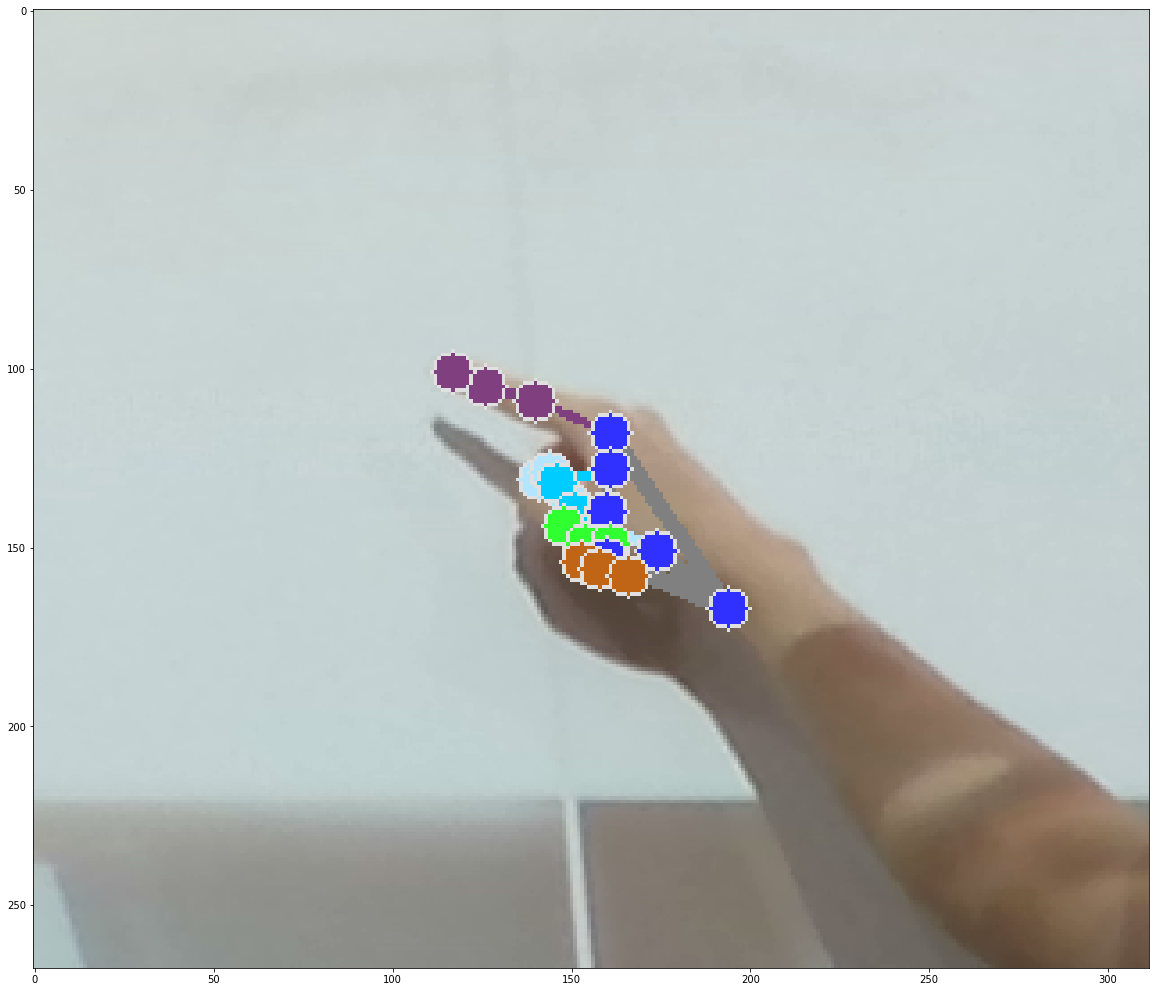

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


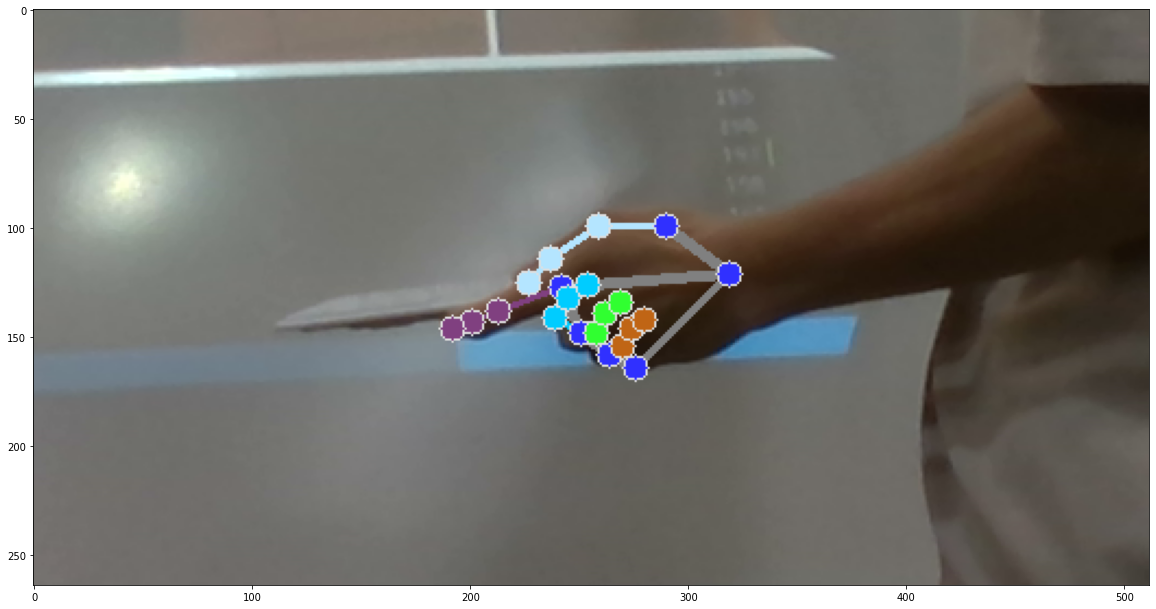

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


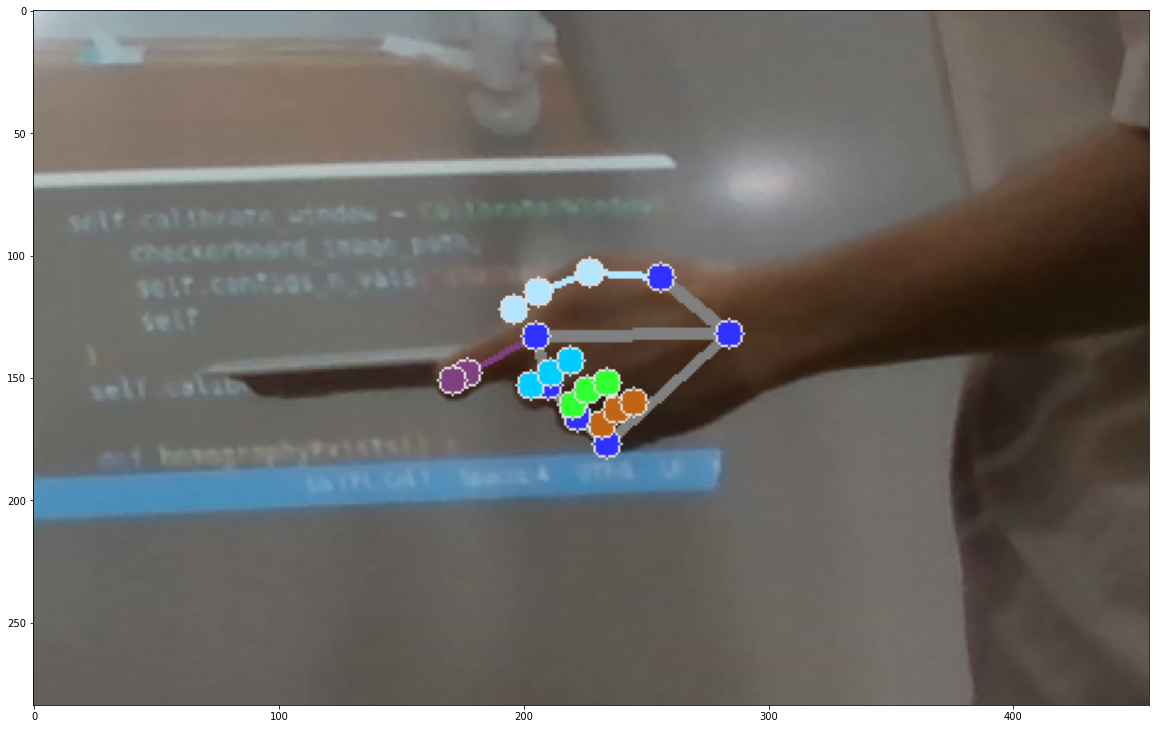

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


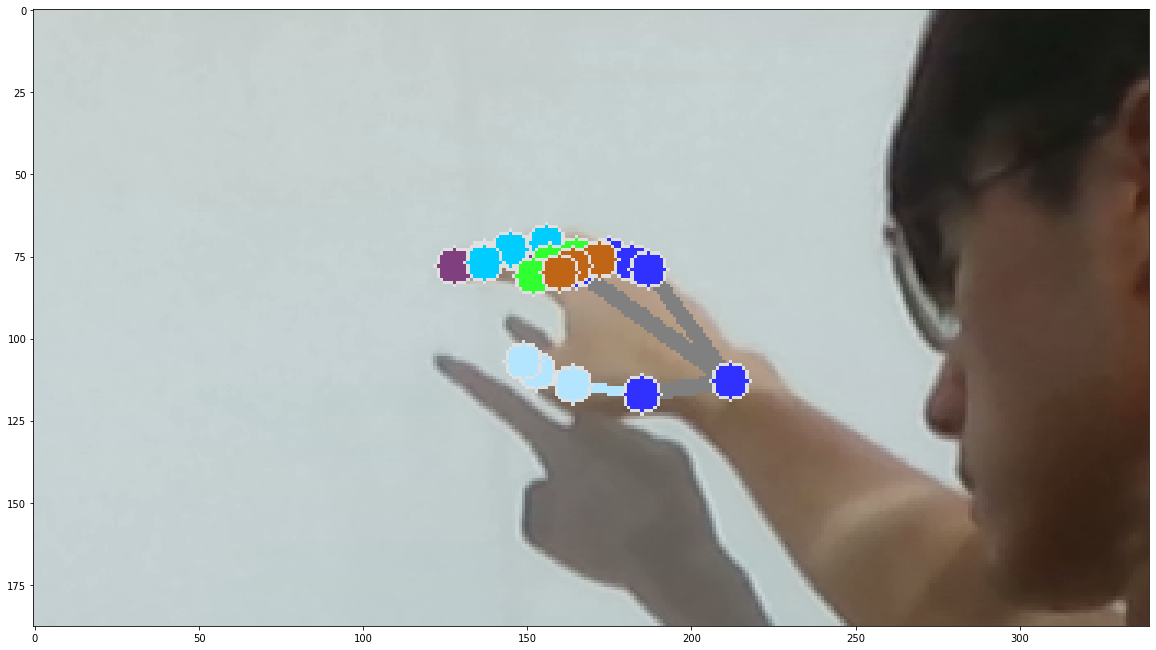

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


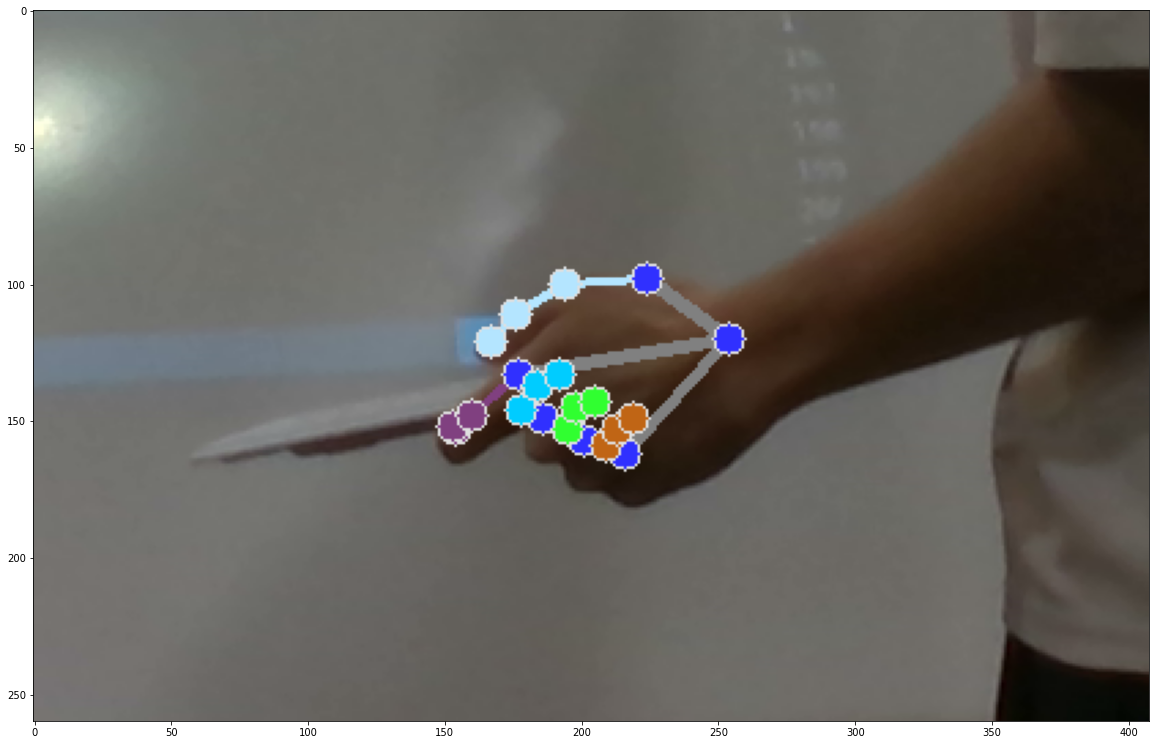

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


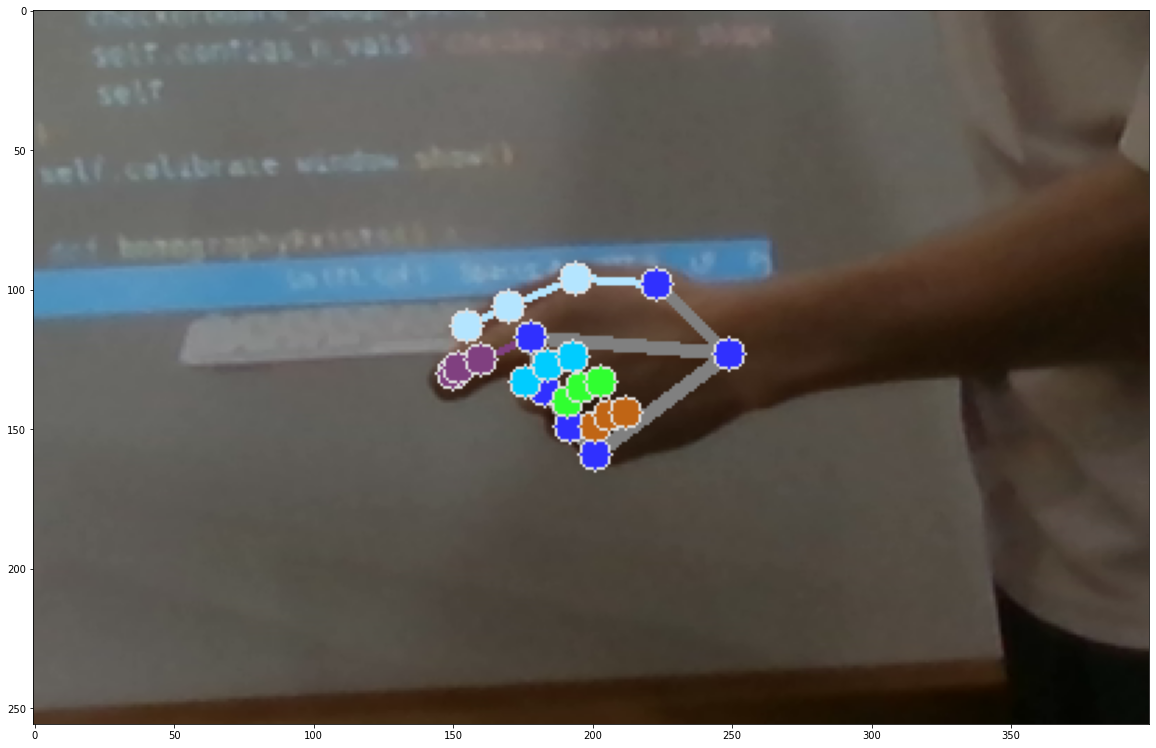

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


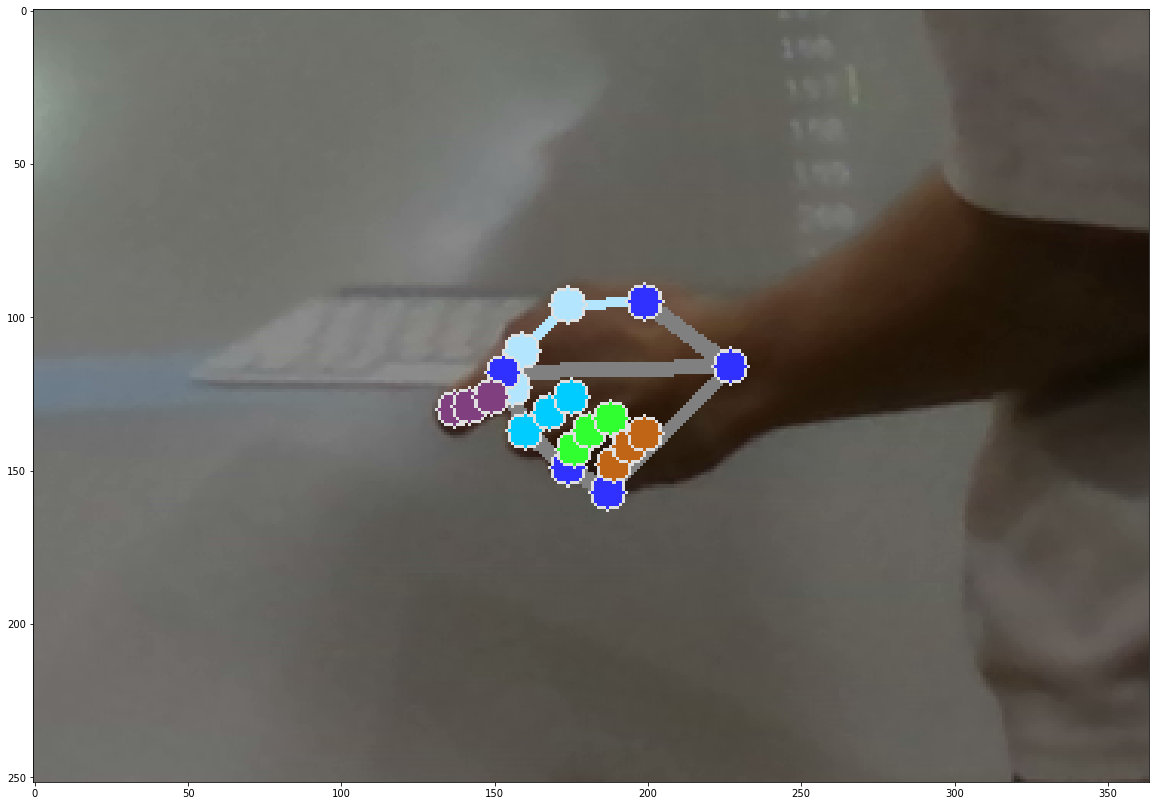

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


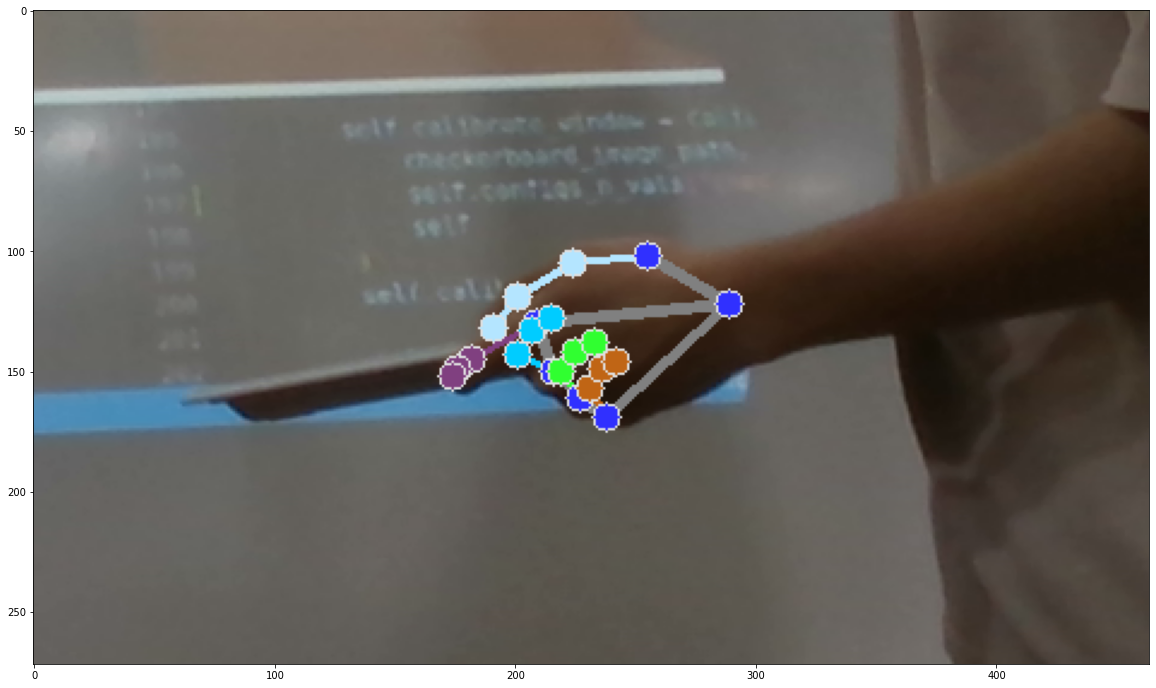

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


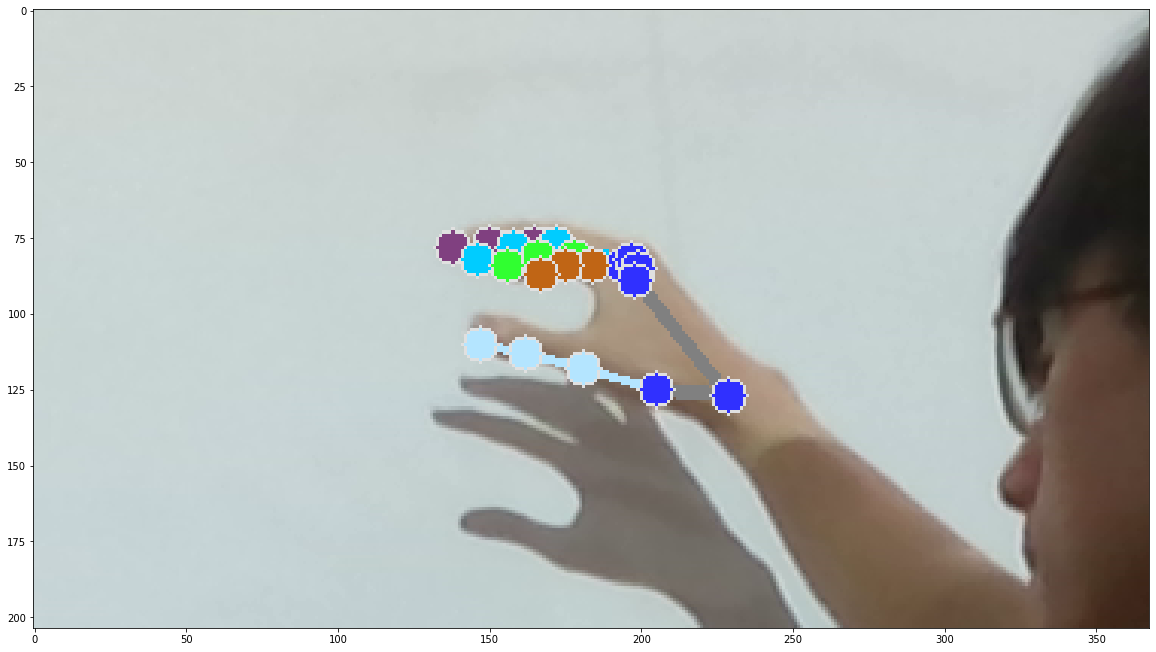

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}
{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


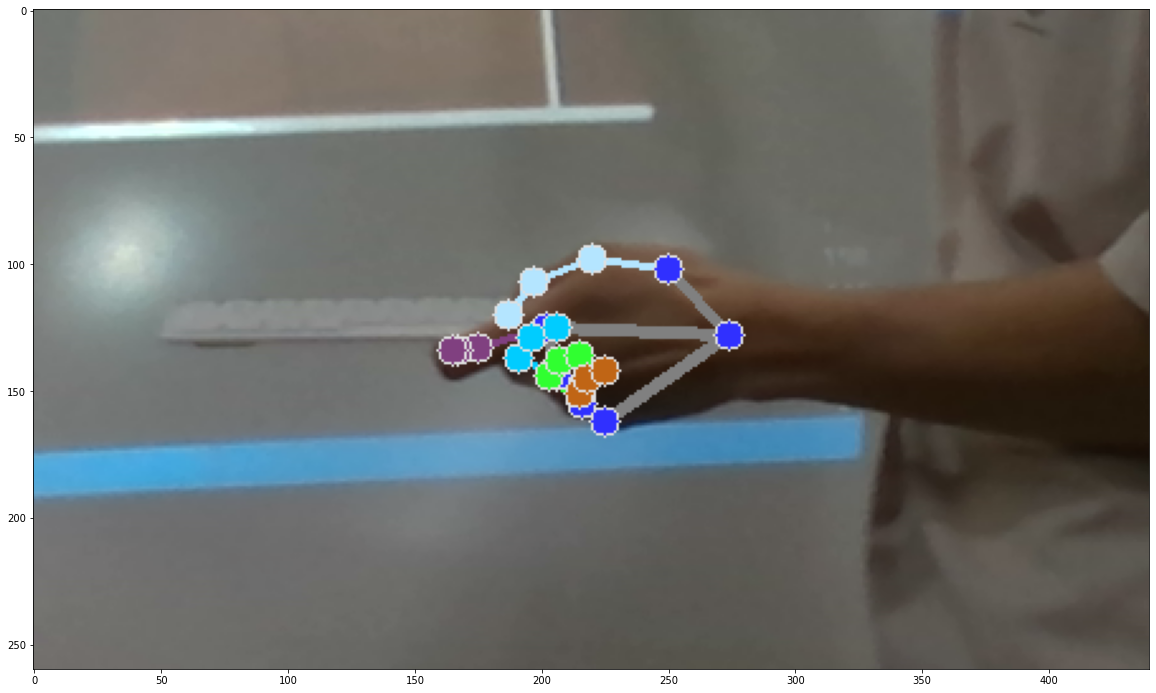

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}
{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}
{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


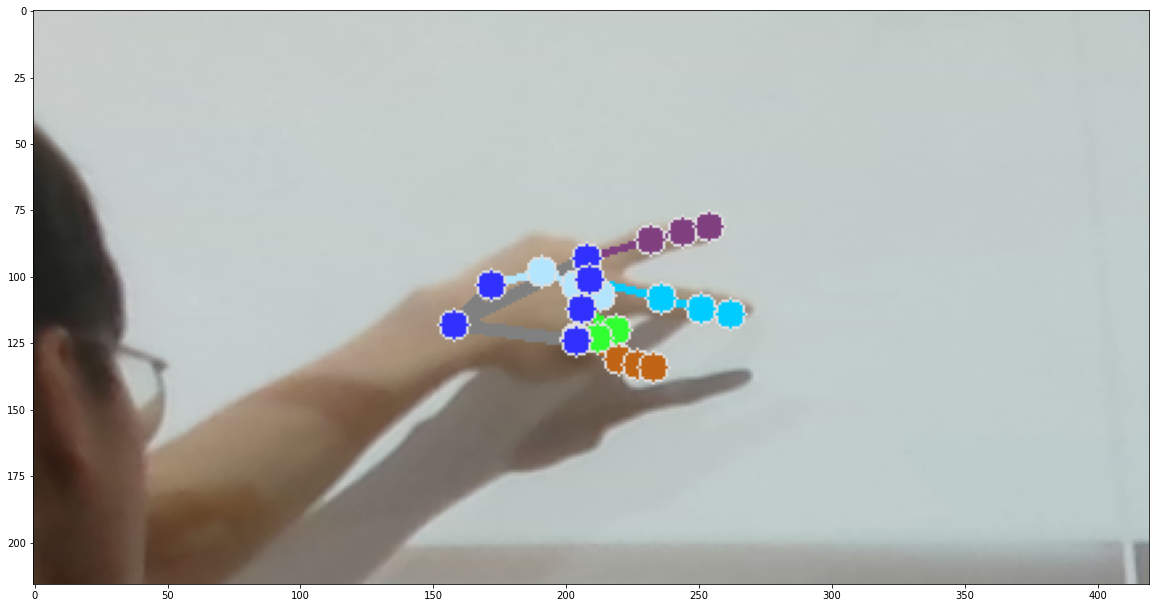

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}
{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


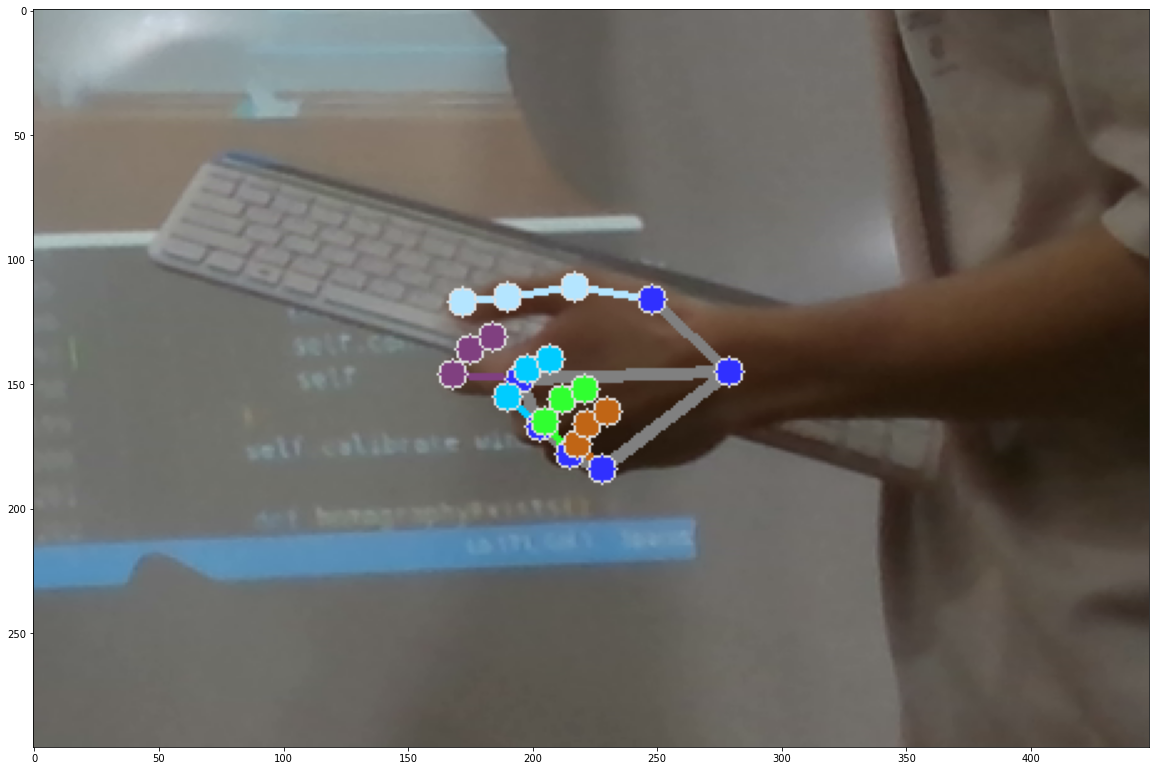

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


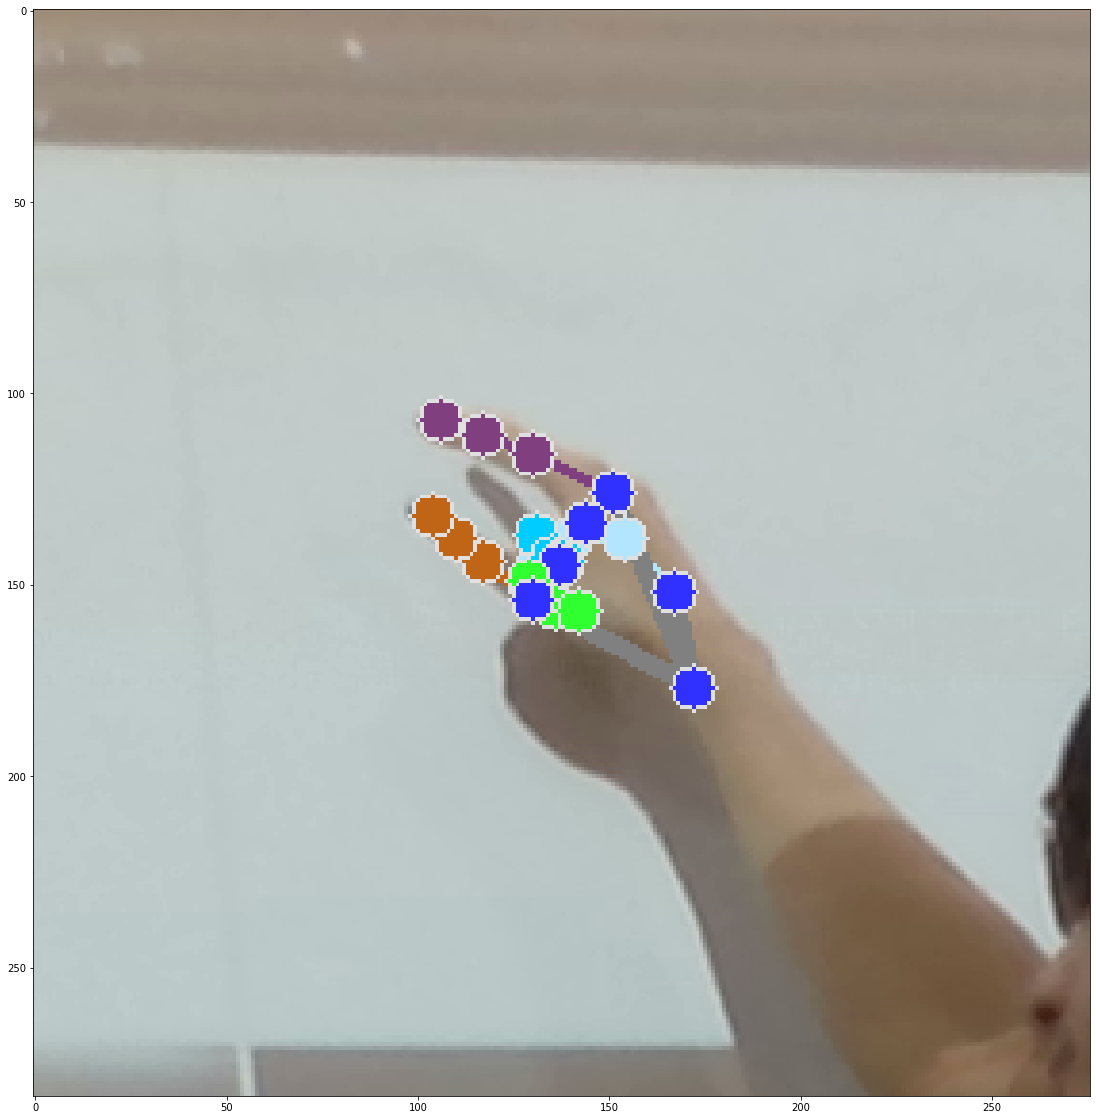

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}
{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


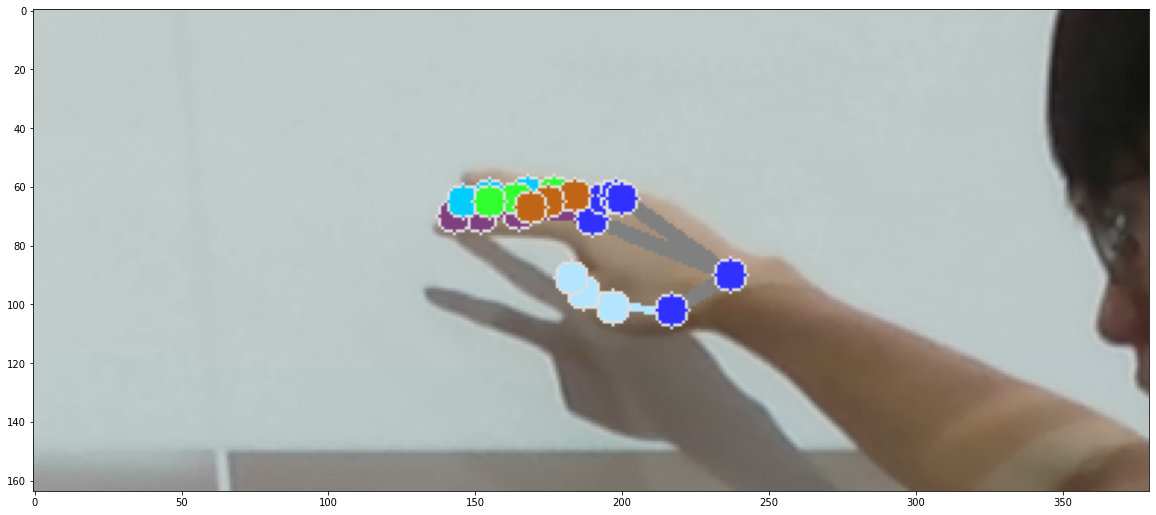

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


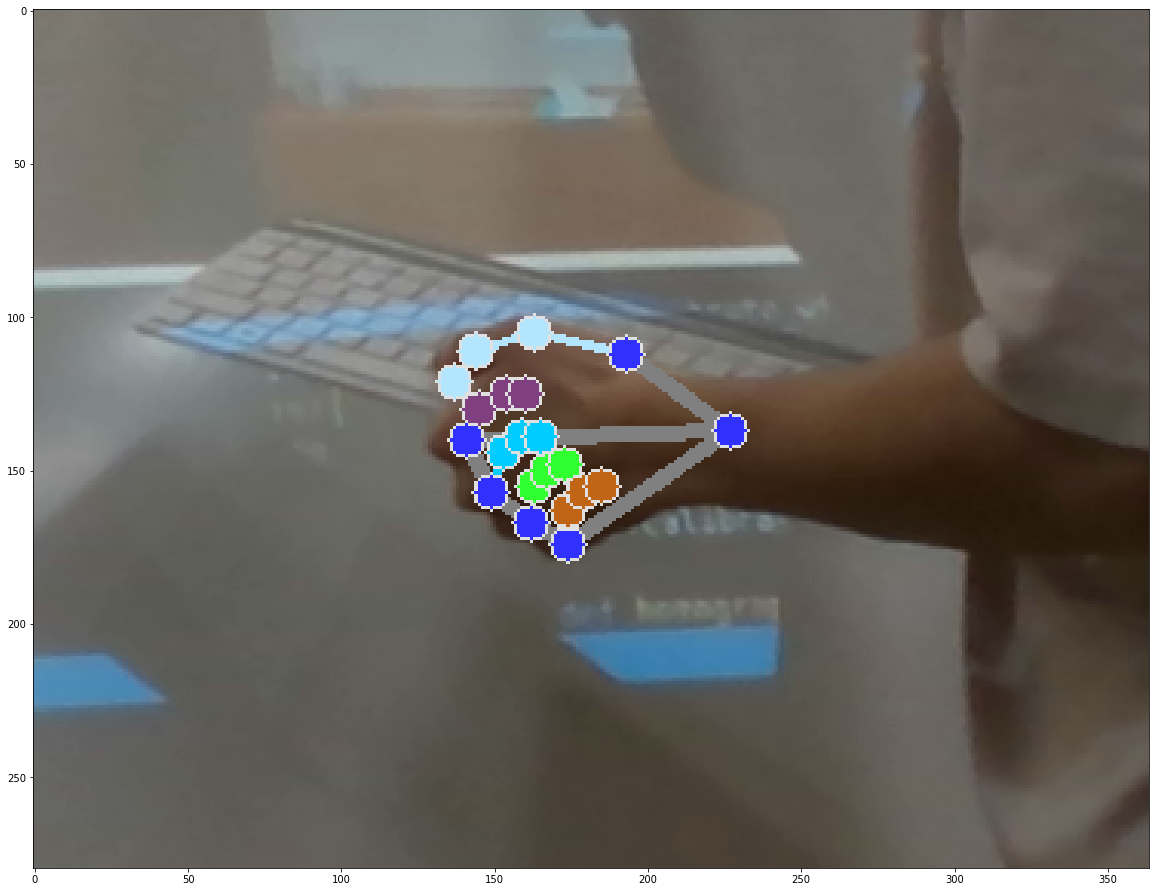

{'f1': 0, 'f2': 0, 'f3': 0, 'f4': 0, 'f5': 0, 'pen': 0, 'eraser': 0, 'none': 0}


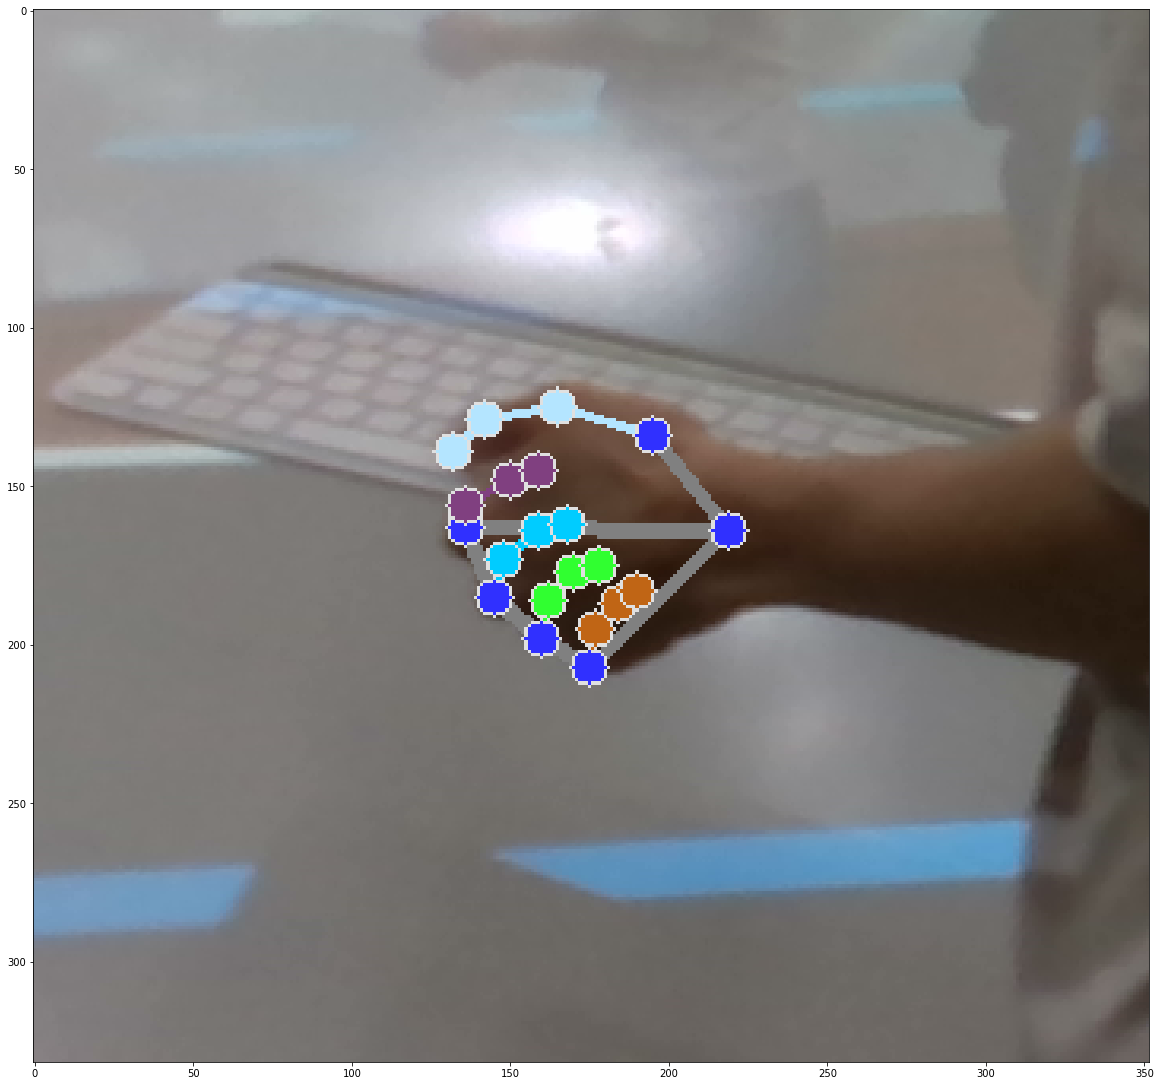

In [23]:
num_files = len(files)

file_numbers_to_watch = []
file_numbers_to_watch = list(
  range(1, num_files, int(num_files / 20))
)

for file_number in file_numbers_to_watch :
  file_name = os.path.join(data_root_dir, f'{file_number:05d}.pkl')
  with open(file_name, "rb") as fp :
    data = pickle.load(fp)
    
    pressure_data = data["pressure_sensor"]

    print(pressure_data)

    image = data["images"]["color_1"]
    
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        left, top, right, bottom = calc_bounding_rect(image, hand_landmarks)

        width, height = right - left, bottom - top
        center_x = int((left + right) / 2)
        center_y = int((top + bottom) / 2)

        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
      plt.figure(figsize=(20, 20))
      plt.imshow(image[
        center_y - height * 2:center_y + height * 2,
        center_x - width  * 2:center_x + width  * 2,
        :
      ])
      plt.show()